### Text and Annotation

• Creating a good visualization involves guiding the reader so that the figure tells a story.

• In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.

• Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.

• Let’s take a look at some data and how we might visualize and annotate it to help convey interesting information.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

### Example: Effect of Holidays on US Births

• Let’s return to some data we worked with earlier, where we generated a plot of average births over the course of the calendar year.

• We’ll start with the same cleaning procedure we used there, and plot the results.

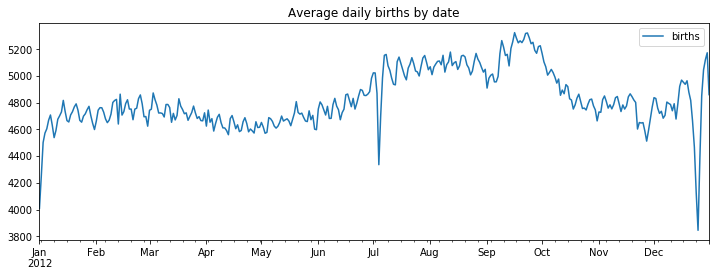

In [2]:
births = pd.read_csv('births.csv')

quantiles = np.percentile(births['births'], [25, 50, 70])
mu, sig = quantiles[1], .74 * (quantiles[2] - quantiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize = (12, 4))

births_by_date.plot(ax = ax)

plt.title('Average daily births by date');

• When we’re communicating data like this, it is often useful to annotate certain features of the plot to draw the reader’s attention.

• This can be done manually with the plt.text / ax.text command, which will place text at a particular x/y value.

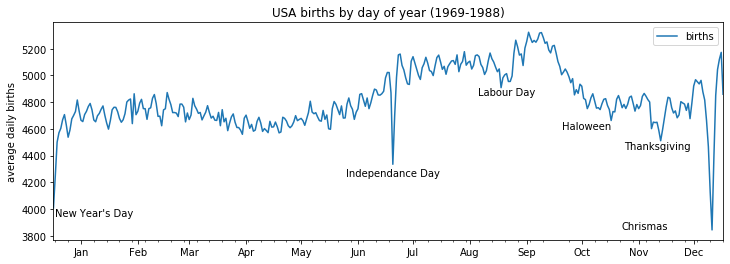

In [3]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

# Add labels to the plot
style = dict(size = 10, color = 'k')

ax.text('2012-01-02', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independance Day", **style, ha = 'center')
ax.text('2012-09-04', 4850, "Labour Day", **style, ha = 'center')
ax.text('2012-10-31', 4600, "Haloween", **style, ha = 'right')
ax.text('2012-11-25', 4450, "Thanksgiving", **style, ha = 'center')
ax.text('2012-12', 3850, "Chrismas", **style, ha = 'right')

# Label the axes
ax.set(title = 'USA births by day of year (1969-1988)', ylabel = 'average daily births')

# Format the x-axis with the centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%h'));

• The ax.text method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.

• Here we used ha='right' and ha='center' , where ha is short for horizonal alignment.

• See the docstring of plt.text() and of mpl.text.Text() for more information on available options.

### Arrows and Annotation

• Along with tick marks and text, another useful annotation mark is the simple arrow.

• Drawing arrows in Matplotlib is often much harder than you might hope.

• While there is a plt.arrow() function available, I wouldn’t suggest using it; the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended.

• Instead, I’d suggest using the plt.annotate() function.

• This function creates some text and an arrow, and the arrows can be very flexibly specified.

• Here we’ll use annotate with several of its options

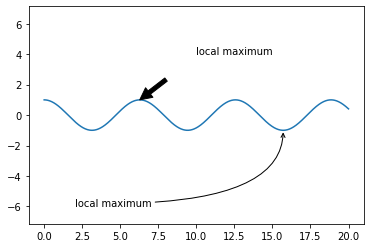

In [9]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy =(6.28, 1),xytext = (10, 4),
            arrowprops = dict(facecolor = 'black', shrink = 0.5))
ax.annotate('local maximum', xy = (5 * np.pi, -1), xytext = (2, -6),
            arrowprops = dict(arrowstyle = "->", connectionstyle = "angle3, angleA = 0, angleB = -90"));

• The arrow style is controlled through the arrowprops dictionary, which has numer‐
ous options available.

• These options are fairly well documented in Matplotlib’s online documentation, so rather than repeating them here I’ll quickly show some of the pos‐
sibilities.

• Let’s demonstrate several of the possible options using the birthrate plot from before.

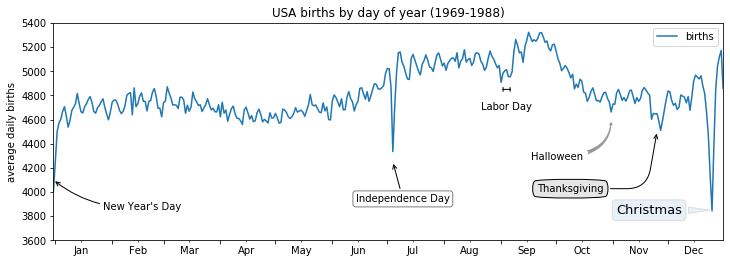

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points', arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-0.2"))
ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"), 
            xytext=(10, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle="->"))
ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data', 
            xytext=(-80, -40), textcoords='offset points', arrowprops=dict(arrowstyle="fancy",
            fc="0.6", ec="none", connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"), arrowprops=dict(arrowstyle="->",
            connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data', 
            xytext=(-30, 0), textcoords='offset points', size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);

• You’ll notice that the specifications of the arrows and text boxes are very detailed: this
gives you the power to create nearly any arrow style you wish.

• Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time-consuming when one is producing publication-quality graphics! Finally, I’ll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.

• More discussion and examples of available arrow and annotation styles can be found in the Matplotlib gallery, in particular http://matplotlib.org/examples/pylab_examples/annotation_demo2.html.